In [167]:
#Millie N White
#5/1/2021
#Programming Oriented Problem #13
#Random Variate Generation Routines
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DESERT ISLAND GENERATOR

In [168]:
#Desert island generator
#returns 1 random variable in a numpy array


def desert_island_generator(distribution_size = 1, seed = 123456789):
     #get 10 random variables
    a = 16807   
    x_0 = seed  #the seed
    m = (2**31)- 1   #number to divide by
    U = [0] * distribution_size #initialize list with trials number of random values to generate

    x = (x_0 * a ) % m        #
    U[0] = x / m           
    for i in range(1,distribution_size):    #
        x =((x * a) + 1) % m          #
        U[i] = x / m           #
        U
        
    #convert list to array
    Uarray = np.asarray(U)
        
    
    return Uarray

In [169]:
#call desert_island_generator function and get 1 pseudo random variable
desert_island_generator()

array([0.2184183])

# CONTINUOUS DISTRIBUTIONS

# UNIFORM 

In [170]:
#X = a + (b − a)U
def uniform(a = 0, b = 1, distribution_size = 1,seed = 123456789):    
    return a + (b - a) * desert_island_generator(distribution_size,seed)

In [171]:
uniform()

array([0.2184183])

In [172]:
# Generate 1000 uniform random variables
unif = uniform(a = 0, b = 1, distribution_size = 1000,seed = 123456789) 

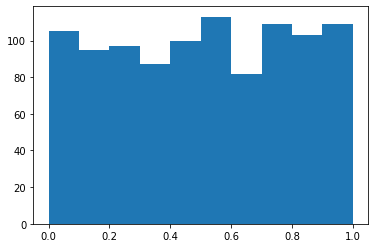

In [173]:
#Plot histogram of 1000 random numbers all with values between 0 and 1

plt.hist(unif)
plt.show()

# WEIBULL

In [174]:
def weibull(lambd = 5,beta = 2,distribution_size = 1):
    seed = random.randint(123456789,500000000000000)
    U = uniform(0,1,distribution_size = distribution_size,seed = seed)
    U = U.tolist()
    weibull = []
    for u in U: #loop through list
        weib = 1/lambd * (-(np.log(1 - u)))** 1/beta   
        weibull.append(weib) #append values in list
   
    return weibull

In [175]:
##Convert one uniform(0,1) to weibull
weibull()

[0.052266313255051516]

In [176]:
wei = weibull(lambd = 0.001,beta = 5,distribution_size = 5000)

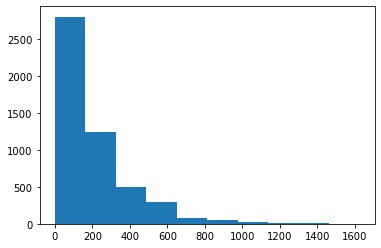

In [177]:
#Histogram with 5000 values in a weibull distribution  

plt.hist(wei)
plt.show()

# TRIANGULAR

In [178]:
#triangular(0,1,2) distribution
def triangular(distribution_size = 1):
    seed = random.randint(123456789,500000000000000)
    U = uniform(0,1,distribution_size = distribution_size,seed = seed)
    triangular = []
    for num in U:

        if num < 0.5:
            tr = np.sqrt(2 * num)
        elif num > 0.5:
            tr = 2 - np.sqrt(2-(1 - num))
        triangular.append(tr)
    
    triangular = np.asarray(triangular)
    
#     if U.any() < 1/2:
#         triangular = np.sqrt(2 * U)
#     elif U.any( )>= 1/2:
#         triangular = 2 - np.sqrt(2-(1 - U))
    return triangular
        
    
    

In [179]:
##Convert one uniform(0,1) to triangular(0,1,2)
triangular()

array([0.75382818])

In [180]:
trian = triangular(1000)

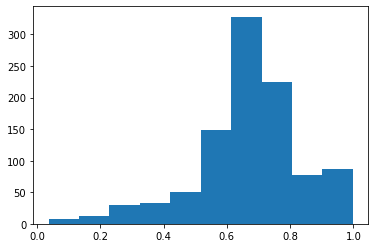

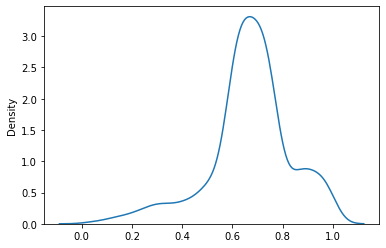

In [181]:
#Histogram with 1000 values of a triangular(0,1,2) distribution  
plt.hist(trian)
plt.show()


sns.kdeplot(trian)
plt.show()

# EXPONENTIAL 

In [15]:
#Generate random variables 
#use the random variables in the exponential distribution formula
#to generate an exponential distribution
def exponential(lambd = 5,distribution_size = 1):
    seed = random.randint(123456789,500000000000000)
    U = uniform(0,1,distribution_size = distribution_size,seed = seed)
    U = U.tolist()
    exponential = []
    for u in U: #loop through list
        exp = -(1/lambd) * np.log(1 - u)
        exponential.append(exp) #append values in list
   
    return exponential

In [16]:
#Convert one uniform(0,1) to exponential
e = exponential()
e

[0.1262384093923044]

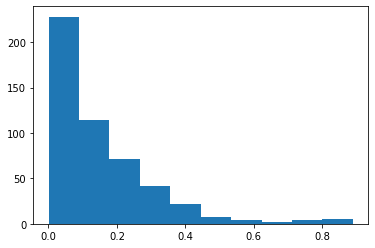

In [19]:
#Histogram of exponential distribution
exp = exponential(7,500)
exp
plt.hist(exp)
plt.show()

# NORMAL 

In [57]:
#Generate Normally distributed random variates from Uniform random generators
#using Box-Muller
#Since Z1 will have a mean of 0 and standard deviation of 1, we can transform Z1 to a new random variable X=Z1*σ+μ to get a normal distribution with mean μ and standard deviation σ.

def normal(mu = 0.0,stdev = 1.0,distribution_size = 1):
    
    seed1 = random.randint(123456789,500000000000000)
    seed2 = random.randint(123456789,500000000000000)
    U1 = uniform(0,1,distribution_size = distribution_size,seed = seed1)
    U2 = uniform(0,1,distribution_size = distribution_size,seed = seed2)
    
    #print(U1)
    z0 = (np.sqrt(-2 * np.log(U1)) )* (np.cos(2 * np.pi * U2))
    z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    
    #z0 with a mean of 0 and standard deviation of 1
    z0 = z0 * stdev + mu
    z1 = z1 * stdev + mu
     
    return z0
    

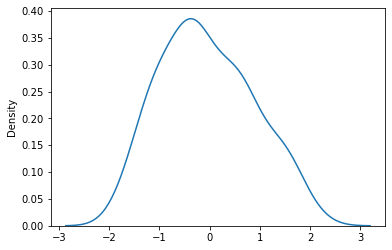

In [58]:
z0 = normal(0,1,100)

#Display distribution
sns.kdeplot(z0)
plt.show()

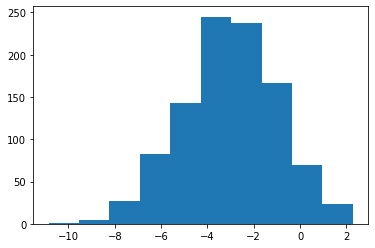

In [59]:
#Normal distribution of 1000 values with mean = -3,standard deviation =2
z1 = normal(-3.0,2.0,1000)

#Display distibution in a histogram
plt.hist(z1)
plt.show()

# DISCRETE DISTRIBUTIONS

# BERNOULLI

In [39]:
#bernoulli - one coin,one trial
def bernoulli(num_coins = 1,distribution_size = 1,p = 0.5):
   
   
    seed = 123456789
    bern = uniform(0,1,distribution_size,seed)

    #check if random variable is less than or greater than probability of 0.5
    #then convert it to integer 0 if false or 1 if true   
    bern = (bern < p).astype(int) 
    return bern


In [40]:
bernoulli()

array([1])

# BINOMIAL

In [41]:
#binomial 1 coin - 1 trial -probability of 0.5
def binomial(num_coins = 1,distribution_size = 1,p = 0.5 ):

    binomials = []  #list of binomial random variables
    for _ in range(distribution_size): #run this 1 time
        seed = random.randint(123456789,500000000000000)
        U = uniform(distribution_size = num_coins,seed = seed)
        
        #check if each value in the array is less than/equal to p and convert to 1 or 0
        ans = (U <= p).astype(int) 
        #Add up the values of each trial
        binomials.append(np.sum(ans))
    return np.array(binomials)

In [42]:
binomial()

array([1])

In [44]:
#flip 3 coins 20 times with probability of 0.5 of getting heads
num_coins = 3
distribution_size = 20
p = 0.5

binom = binomial(3,20,0.55)
binom

array([2, 1, 2, 2, 1, 0, 3, 1, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 0, 2])

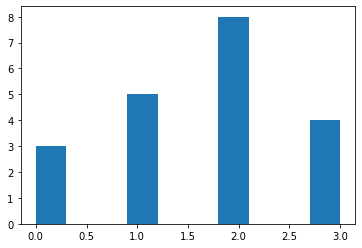

In [45]:
#Histogram showing binomial distribution of 3 weighted coins flipped 20 times with 
#probability 0.55 of getting heads

binom = binomial(3,20,0.55)

#Display distibution in a histogram
plt.hist(binom)
plt.show()

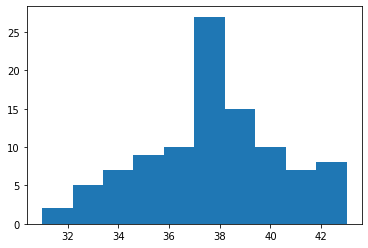

In [56]:
#flip 50 weighted coins 100 times with probability of 0.75 of getting heads
#binomial 50 coins, 100 trials ,p= 0.75
num_coins = 50
distribution_size = 100
p = 0.75
binom2 = binomial(50,100,0.75)

#Display distibution in a histogram
plt.hist(binom2)
plt.show()

# GEOMETRIC 

In [50]:
def geometric(distribution_size = 1,p = 0.3):
    seed = random.randint(123456789,500000000000000)
    U = uniform(0,1,distribution_size = distribution_size,seed = seed)
    geometric = np.log(1 - U) / np.log(1 - p)
    return geometric

In [51]:
#p = 0.3 
geometric()

array([7.02004936])

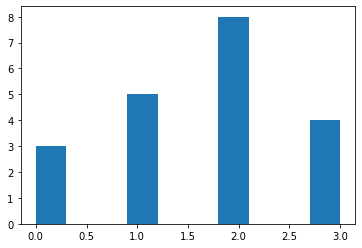

In [54]:
#Histogram of geometric distribution of size 10 with p = 0.3
geometric(10,0.3)
plt.hist(binom)
plt.show()